In [1]:
import sys
sys.path.append(r'..\\..\\..\\gempy')
import gempy as gp
import numpy as np
%matplotlib inline

..\\..\\..\\gempy\gempy\plotting\visualization.py:31: UserWarning: Vtk package is not installed. No vtk visualization available.
  warnings.warn('Vtk package is not installed. No vtk visualization available.')
..\\..\\..\\gempy\gempy\data_management.py:34: UserWarning: qgrid package is not installed. No interactive dataframes available.
  warnings.warn('qgrid package is not installed. No interactive dataframes available.')
..\\..\\..\\gempy\gempy\posterior_analysis.py:24: UserWarning: pymc (v2) package is not installed. No support for stochastic simulation posterior analysis.
  warnings.warn("pymc (v2) package is not installed. No support for stochastic simulation posterior analysis.")
..\\..\\..\\gempy\gempy\posterior_analysis.py:28: UserWarning: pymc (v3) package is not installed. No support for stochastic simulation posterior analysis.
  warnings.warn("pymc (v3) package is not installed. No support for stochastic simulation posterior analysis.")


In [2]:
geo_data = gp.create_data([777000,794500,6345000,6350600,-1500,500],[40,40,40],
                        path_i = 'input_data\\Elisa_model-interfaces.csv',
                        path_o = "input_data\\Elisa_model-orientations.csv")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [3]:
#sorting of lithologies
gp.set_series(geo_data,{"fault1":('E_Affenadou'), "fault2":('E_MasDieu'), "Trias_Series":('LIAS','TRIAS'), 
                        "Carbon_Series":('CARBO'), "Basement_Series":('basement')},
             order_formations=np.array(['E_Affenadou','E_MasDieu','LIAS','TRIAS','CARBO','basement']))

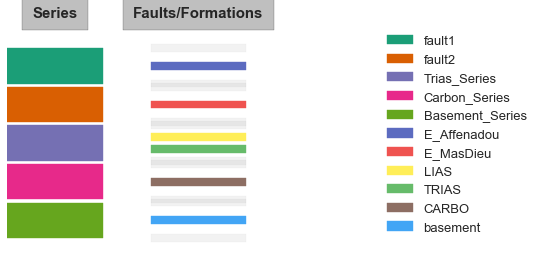

In [4]:
gp.get_sequential_pile(geo_data)

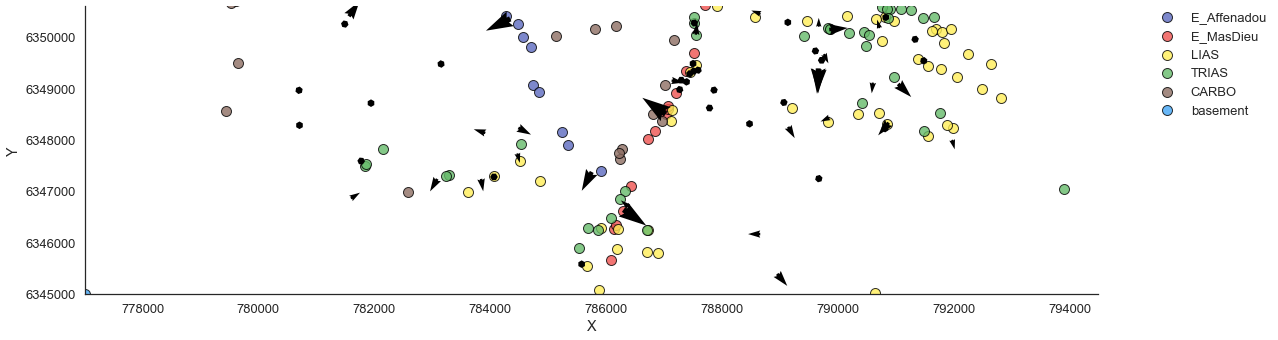

In [5]:
gp.plotting.plot_data(geo_data,direction='z')

In [6]:
#Compiling of interpolator function
interp_data = gp.InterpolatorData(geo_data, compile_theano=True,
                                  dtype='float64',theano_optimizer='fast_compile', verbose=[])

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  2


In [7]:
geo_data.faults_relations.loc[['fault1', 'fault2'], ['Trias_Series']] = True

In [18]:
geo_data.faults_relations.loc['fault1', ['Carbon_Series']] = False

In [19]:
geo_data.faults_relations

,fault1,fault2,Trias_Series,Carbon_Series,Basement_Series
fault1,False,False,True,False,False
fault2,False,False,True,False,False
Trias_Series,False,False,False,False,False
Carbon_Series,False,False,False,False,False
Basement_Series,False,False,False,False,False


In [20]:
interp_data.update_interpolator(geo_data)

In [22]:
interp_data.interpolator.tg.fault_relation.get_value()

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [25]:
lith_block, fault_block = gp.compute_model(interp_data)

self fault matrix fix __str__ = [[1. 1. 1. ... 1. 1. 1.]
 [3. 3. 3. ... 3. 3. 3.]]
self fault matrix fix __str__ = [[1. 1. 1. ... 1. 1. 1.]
 [3. 3. 3. ... 3. 3. 3.]]
self fault matrix fix __str__ = [[1. 1. 1. ... 1. 1. 1.]
 [3. 3. 3. ... 3. 3. 3.]]
self fault matrix fix __str__ = [[1. 1. 1. ... 1. 1. 1.]
 [3. 3. 3. ... 3. 3. 3.]]


..\\..\\..\\gempy\gempy\gempy_front.py:955: FutureWarning: gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead
  "use gempy.plotting module instead", FutureWarning)


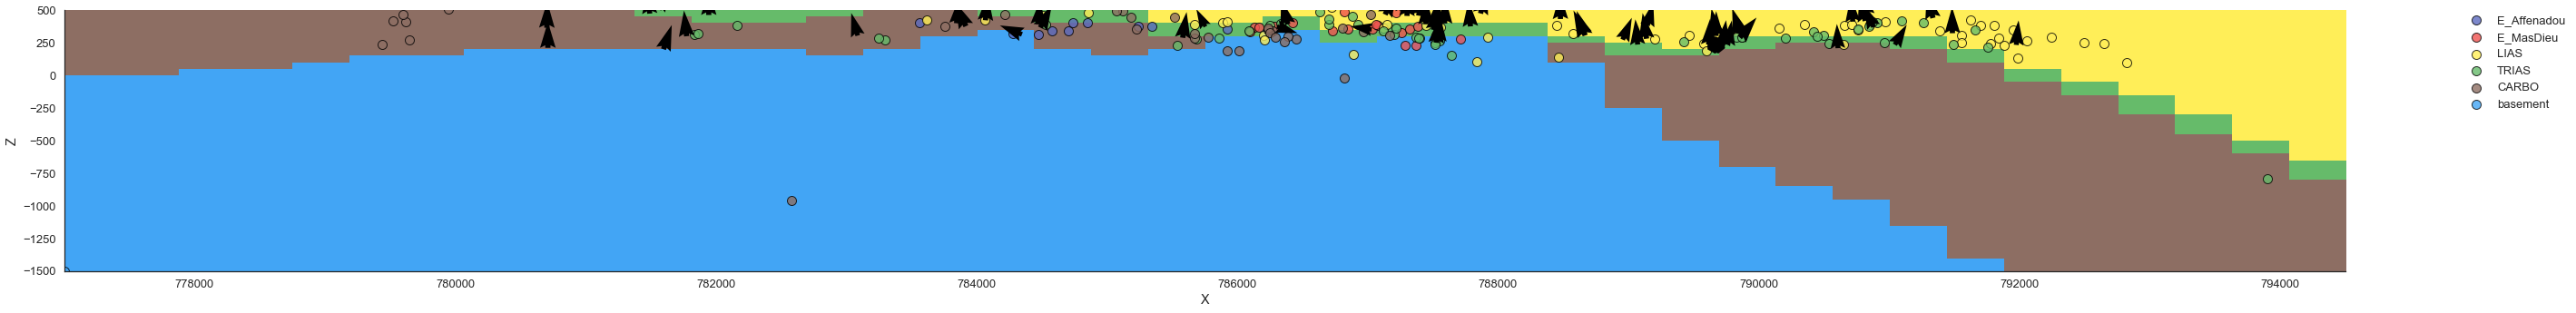

In [26]:
gp.plot_section(geo_data, lith_block[0], cell_number=20,  direction='y', plot_data=True)

..\\..\\..\\gempy\gempy\gempy_front.py:955: FutureWarning: gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead
  "use gempy.plotting module instead", FutureWarning)


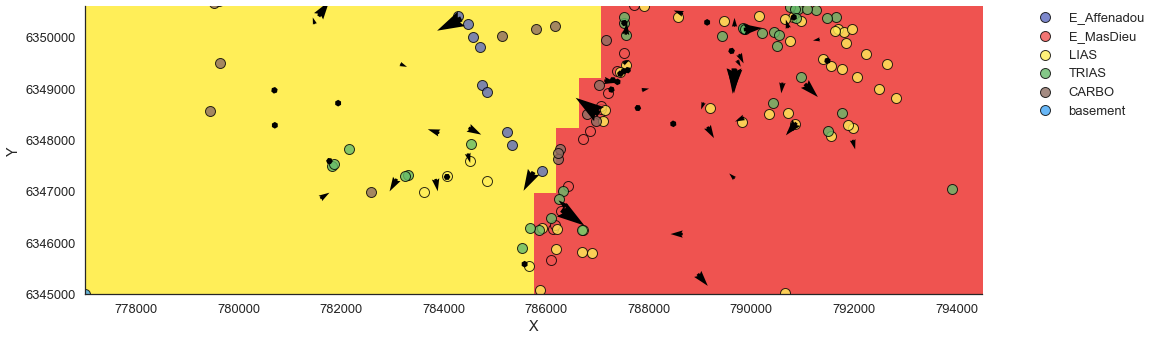

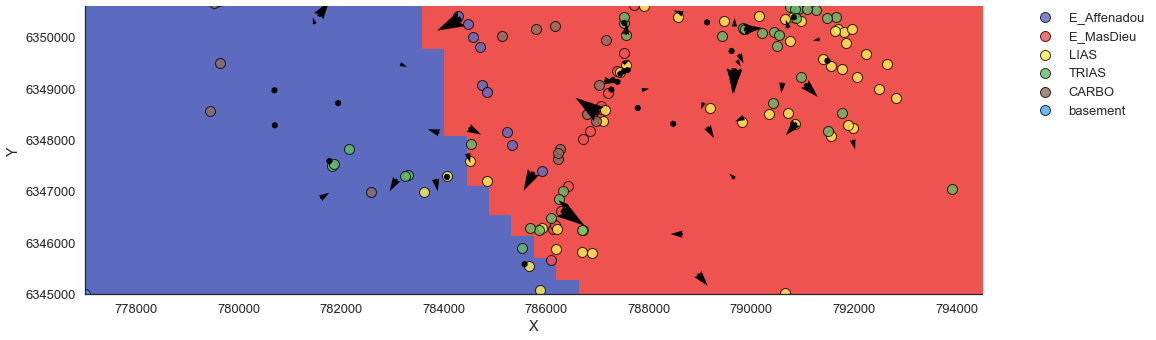

In [16]:
#faults
gp.plot_section(geo_data, fault_block[2], cell_number=5,  direction='z', plot_data=True)
gp.plot_section(geo_data, fault_block[0], cell_number=5,  direction='z', plot_data=True)